<a href="https://colab.research.google.com/github/MIbrahim-Nasir/Cpp/blob/main/IMAGIFY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --quiet accelerate transformers diffusers better_profanity mediapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.9 MB/s eta 0:00:00


In [3]:
model = "dreamlike-art/dreamlike-photoreal-2.0"

In [4]:
from diffusers import EulerAncestralDiscreteScheduler as EAD
scheduler = EAD.from_pretrained(model, subfolder = "scheduler")

In [5]:
from diffusers import StableDiffusionPipeline as sdp
device = "cuda"

pipe = sdp.from_pretrained(
    model,
    scheduler = scheduler
)
pipe = pipe.to(device)

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

In [6]:
from better_profanity import Profanity

def has_profanity(text):
  return Profanity().contains_profanity(text)

def filter_text(text):
  while has_profanity(text):
    text = input("Enter alternate prompt: ")
  return text

In [1]:
prompt = input("Enter your prompt: ")
flt_input = filter_text(prompt)

Enter your prompt: Self driving delivery robot that uses the railings attached to metro bridges to travel


NameError: ignored

In [11]:
import mediapy as mp
num_images = 4

images = pipe(
    flt_input,
    height = 512,
    width = 512,
    num_inference_steps = 50,
    guidance_scale = 15,
    num_images_per_prompt = num_images
).images

  0%|          | 0/50 [00:00<?, ?it/s]

,,,

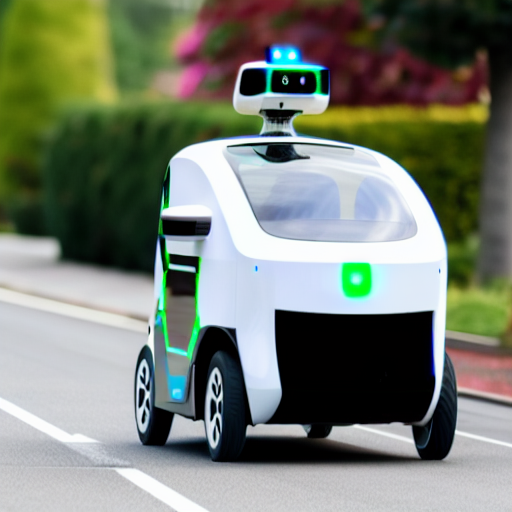
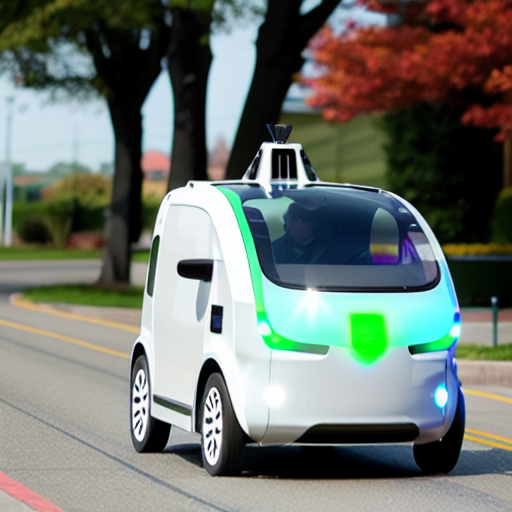
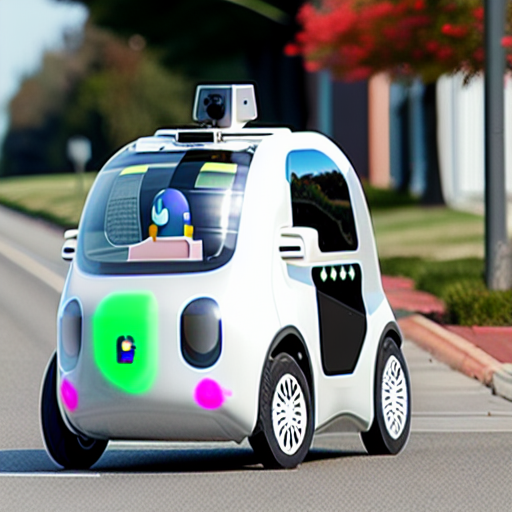
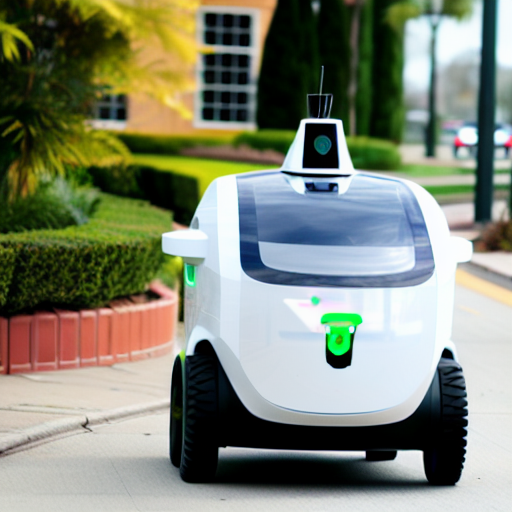

In [12]:
mp.show_images(images)